In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import jaccard_score as js
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

In [21]:
data =  pd.read_csv('./dataset/heart_statlog_cleveland_hungary.csv' , sep=';')
print(data.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [22]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [23]:
print(X)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [24]:
print(Y)

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64


In [25]:
# pisahkan data training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1190, 11) (952, 11) (238, 11)


In [27]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1190,) (952,) (238,)


In [28]:
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 952
Jumlah data uji: 238


In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, Y_train)

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('akurasi data training : ', training_data_accuracy)

akurasi data training :  0.8266806722689075


In [33]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
print('akurasi data testing : ', test_data_accuracy)

akurasi data testing :  0.8109243697478992


In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, log_loss, jaccard_score

# Handle missing values (if any)
# Check for missing values
print(data.isnull().sum())  # Identify columns with missing values

# Preprocess categorical features
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
le = LabelEncoder()  # Create a LabelEncoder object
df = data.copy()  # Create a copy to avoid modifying the original data

# Encode categorical features using LabelEncoder
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature scaling (recommended for Logistic Regression)
scaler = StandardScaler()
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']  # Assuming these are numerical
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Create the Logistic Regression model
LR = LogisticRegression(solver='liblinear', max_iter=1000)  # Increased max_iter for potential convergence issues

# Train the model
LR.fit(X_train, Y_train)

# Make predictions
Y_pred = LR.predict(X_test)
predict_proba = LR.predict_proba(X_test)

# Evaluate the model
LR_Accuracy_Score = accuracy_score(Y_test, Y_pred)
LR_JaccardIndex = jaccard_score(Y_test, Y_pred)  # Use jaccard_score instead of jaccard_similarity_score
LR_F1_Score = f1_score(Y_test, Y_pred)
LR_Log_Loss = log_loss(Y_test, predict_proba)
LR_Confusion_Matrix = confusion_matrix(Y_test, Y_pred)

# Create a report DataFrame
report_data = [
    [LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score, LR_Log_Loss, LR_Confusion_Matrix]
]
report_df = pd.DataFrame(report_data, columns=['Accuracy', 'Jaccard', 'F1', 'Log Loss', 'CM'], index=['Logistic Regression'])
print(report_df)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
                     Accuracy   Jaccard        F1  Log Loss  \
Logistic Regression  0.831933  0.716312  0.834711  0.398371   

                                        CM  
Logistic Regression  [[97, 15], [25, 101]]  


Perhatian: Plot ini hanya memvisualisasikan satu fitur ('max heart rate'). Regresi Logistik biasanya menggunakan banyak fitur.
Untuk pemodelan yang lebih akurat, gunakan semua fitur.


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


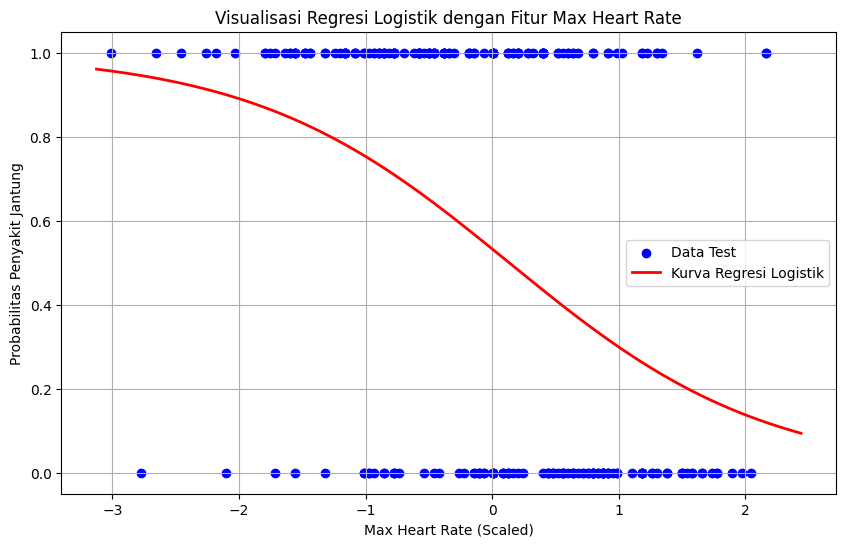

Akurasi model dengan semua fitur: 0.8613445378151261
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Pra-pemrosesan Data
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

le = LabelEncoder()
df = data.copy()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Memisahkan Fitur dan Target
X = df.drop('target', axis=1)
Y = df['target']

# Memilih Satu Fitur untuk Visualisasi (Contoh: 'max heart rate')
X_visual = X[['max heart rate']] #Pilih satu fitur untuk divisualisasikan.
# Penting: Regresi Logistik umumnya bekerja dengan banyak fitur. Visualisasi ini hanya untuk demonstrasi.
if (len(X.columns) > 1):
  print("Perhatian: Plot ini hanya memvisualisasikan satu fitur ('max heart rate'). Regresi Logistik biasanya menggunakan banyak fitur.")
  print("Untuk pemodelan yang lebih akurat, gunakan semua fitur.")

# Membagi Data Menjadi Training dan Testing (penting untuk evaluasi yang tepat)
X_train_visual, X_test_visual, Y_train_visual, Y_test_visual = train_test_split(X_visual, Y, test_size=0.2, random_state=42)

# Membuat dan Melatih Model dengan SATU Fitur
model_visual = LogisticRegression()
model_visual.fit(X_train_visual, Y_train_visual)

# Membuat Data untuk Plot Kurva
X_test_plot = np.linspace(X_visual.min(), X_visual.max(), 300).reshape(-1, 1) #Rentang X untuk plot
Y_prob = model_visual.predict_proba(X_test_plot)[:, 1]

# Plot Data dan Kurva Regresi Logistik
plt.figure(figsize=(10, 6))
plt.scatter(X_test_visual, Y_test_visual, c='blue', marker='o', label='Data Test') #Data test dipisahkan agar lebih jelas
plt.plot(X_test_plot, Y_prob, color='red', linewidth=2, label='Kurva Regresi Logistik')
plt.xlabel('Max Heart Rate (Scaled)') #Label disesuaikan
plt.ylabel('Probabilitas Penyakit Jantung')
plt.title('Visualisasi Regresi Logistik dengan Fitur Max Heart Rate')
plt.legend()
plt.grid(True)
plt.show()

# Pemodelan dengan SEMUA Fitur (untuk prediksi yang lebih baik)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model_all_features = LogisticRegression(max_iter=1000) #max iter ditambahkan untuk konvergensi
model_all_features.fit(X_train, Y_train)

# Evaluasi model dengan semua fitur
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Y_pred_all = model_all_features.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_all)
print(f"Akurasi model dengan semua fitur: {accuracy}")
print(classification_report(Y_test, Y_pred_all))

In [37]:
# model prediksi
input_data = (54, 1, 3,	150, 195, 0, 0,	122, 0,	0.0, 1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('Tidak Terkena Penyakit Jantung')
else:
    print('Terkena Penyakit Jantung')

[0]
Tidak Terkena Penyakit Jantung


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [39]:
import pickle

# Contoh model Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)  # Melatih model

# Menyimpan model
with open('penyakit_jantung.pkl', 'wb') as file:
    pickle.dump(model, file)
